In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from ultralytics import YOLO

In [33]:
model = YOLO(r"E:\AId\stable-diffusion-webui\runs\detect\train7\weights\best.pt")

In [27]:
model

{'date': '2024-07-26T03:05:20.281806',
 'version': '8.2.63',
 'license': 'AGPL-3.0 (https://ultralytics.com/license)',
 'docs': 'https://docs.ultralytics.com',
 'epoch': -1,
 'best_fitness': None,
 'model': DetectionModel(
   (model): Sequential(
     (0): Conv(
       (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (1): Conv(
       (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (2): C2f(
       (cv1): Conv(
         (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
         (act): SiLU(inplace=True)
       )
       (cv2): 

In [5]:
img = "https://www.a2hosting.com/blog/content/uploads/2020/11/heavy-traffic.jpg"
results = model(img)


Found https://www.a2hosting.com/blog/content/uploads/2020/11/heavy-traffic.jpg locally at heavy-traffic.jpg
image 1/1 C:\Users\user\Desktop\Yolov8 drowsiness detection\heavy-traffic.jpg: 448x640 (no detections), 85.2ms
Speed: 2.0ms preprocess, 85.2ms inference, 13.0ms postprocess per image at shape (1, 3, 448, 640)


In [6]:
type(results)

list

In [7]:
print(results[0].plot())

[[[64 51 29]
  [61 48 26]
  [58 44 26]
  ...
  [33 23  6]
  [30 21  8]
  [40 31 18]]

 [[63 51 27]
  [60 47 25]
  [57 43 24]
  ...
  [23 13  0]
  [22 13  0]
  [39 30 17]]

 [[64 53 26]
  [61 50 23]
  [59 47 23]
  ...
  [33 23  5]
  [30 21  7]
  [52 43 29]]

 ...

 [[76 54 13]
  [77 55 14]
  [78 56 15]
  ...
  [ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]]

 [[77 55 13]
  [77 55 13]
  [78 56 14]
  ...
  [ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]]

 [[78 56 14]
  [78 56 14]
  [79 57 15]
  ...
  [ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]]]


<function matplotlib.pyplot.show(close=None, block=None)>

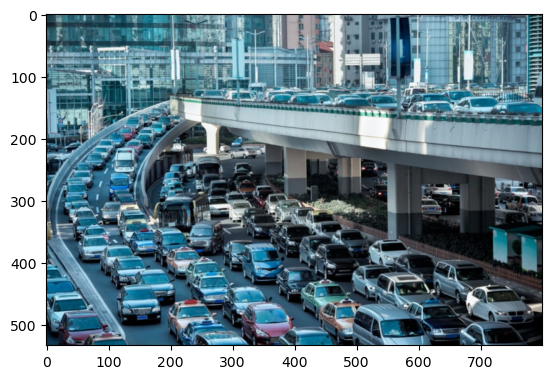

In [34]:
%matplotlib inline
plt.imshow(results[0].plot()[...,::-1])
plt.show

In [9]:
print(results[0].orig_img)

[[[64 51 29]
  [61 48 26]
  [58 44 26]
  ...
  [33 23  6]
  [30 21  8]
  [40 31 18]]

 [[63 51 27]
  [60 47 25]
  [57 43 24]
  ...
  [23 13  0]
  [22 13  0]
  [39 30 17]]

 [[64 53 26]
  [61 50 23]
  [59 47 23]
  ...
  [33 23  5]
  [30 21  7]
  [52 43 29]]

 ...

 [[76 54 13]
  [77 55 14]
  [78 56 15]
  ...
  [ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]]

 [[77 55 13]
  [77 55 13]
  [78 56 14]
  ...
  [ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]]

 [[78 56 14]
  [78 56 14]
  [79 57 15]
  ...
  [ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]]]


In [10]:
# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()
    
#     results = model(frame)
    
#     cv2.imshow("YOLO", results[0].plot())
    
#     if cv2.waitKey(10) & 0xFF == ord("q"):
#         break
        
# cap.release()
# cv2.destroyAllWindows()

In [11]:
import uuid
import os
import time
from pathlib import Path

In [12]:
IMAGES_PATH = os.path.join("data","images")
labels = ["awake", "drowsy"]
number_imgs = 20
Path(IMAGES_PATH).mkdir(parents=True, exist_ok=True)

In [13]:
# cap = cv2.VideoCapture(0)
# for label in labels:
#     print(f"Collecting images for {label}")
#     time.sleep(5)
    
#     for img_num in range(number_imgs):
#         print(f"Collecting images for {label}, image number {img_num+1}")
        
#         ret, frame = cap.read()
        
#         imgname = os.path.join(IMAGES_PATH, label+"."+str(uuid.uuid1())+".jpg")
        
#         cv2.imwrite(imgname,frame)
#         cv2.imshow("Image Collection", frame)
#         time.sleep(2)
        
#         if cv2.waitKey(10) & 0xFF == ord("q"):
#             break
        
# cap.release()
# cv2.destroyAllWindows()

In [14]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [15]:
!cd labelimg && pyrcc5 -o libs/resources.py resources.qrc

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [17]:
results = model.train(data="dataset.yaml", epochs=500, imgsz=320, device=device, batch=16)

New https://pypi.org/project/ultralytics/8.2.66 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.63  Python-3.11.5 torch-2.1.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=dataset.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning C:\Users\user\Desktop\Yolov8 drowsiness detection\data\labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]
val: Scanning C:\Users\user\Desktop\Yolov8 drowsiness detection\data\labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to E:\AId\stable-diffusion-webui\runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000476, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to E:\AId\stable-diffusion-webui\runs\detect\train8
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500     0.973G       3.73      5.226      4.201         16        320: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500     0.994G      3.695      5.175      4.194         15        320: 100%|██████████| 3/3 [00:00<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.74it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500     0.994G      3.626      5.196      4.175         17        320: 100%|██████████| 3/3 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.78it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500     0.994G      3.595       5.16      4.187         14        320: 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.51it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500     0.994G       3.88      5.188      4.166         14        320: 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.24it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500     0.994G      3.542      5.215       4.17         14        320: 100%|██████████| 3/3 [00:00<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.29it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500         1G      3.549      5.163      4.175         14        320: 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.29it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500         1G      3.634      5.174      4.152         13        320: 100%|██████████| 3/3 [00:00<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.11it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      1.01G      3.547       5.12      4.146         19        320: 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.66it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500         1G       3.54      5.137       4.21         19        320: 100%|██████████| 3/3 [00:00<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.37it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500         1G      3.544      5.131      4.143          9        320: 100%|██████████| 3/3 [00:00<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.56it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500         1G      3.574      5.064      4.123         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.42it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500         1G      3.385      5.068      4.133         13        320: 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.78it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500         1G      3.606      4.987      4.123         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.60it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      1.01G      3.522      5.009      4.094         15        320: 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.79it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500         1G        3.3      4.872      4.099         14        320: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.74it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500         1G        3.3      4.799      4.058         12        320: 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.86it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500         1G       3.26      4.685       4.04         10        320: 100%|██████████| 3/3 [00:00<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500         1G      3.389      4.671      4.028         11        320: 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.20it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500         1G       3.31      4.467      4.023         17        320: 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.88it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500         1G      3.371      4.311      3.966         16        320: 100%|██████████| 3/3 [00:00<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.50it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500         1G       3.31      4.244      3.952         11        320: 100%|██████████| 3/3 [00:00<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.46it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      1.01G      2.992      4.046      3.917         17        320: 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.91it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500         1G      3.068      3.641      3.839         20        320: 100%|██████████| 3/3 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.11it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500         1G      2.674       3.46      3.892         10        320: 100%|██████████| 3/3 [00:00<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.72it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500         1G      2.837      3.317      3.873         18        320: 100%|██████████| 3/3 [00:00<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.87it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500         1G      2.613      3.226      3.824         13        320: 100%|██████████| 3/3 [00:00<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.58it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      1.01G      2.762      3.327      3.812         16        320: 100%|██████████| 3/3 [00:00<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.62it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500         1G      2.405      2.887      3.587         14        320: 100%|██████████| 3/3 [00:00<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.24it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      1.01G      2.663      3.077      3.738         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.82it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500         1G      2.592      2.838      3.609         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      1.01G       2.76      2.979      3.644         23        320: 100%|██████████| 3/3 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.86it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500         1G      2.583      2.802      3.457         10        320: 100%|██████████| 3/3 [00:00<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.69it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      1.01G       2.57      2.622      3.434         16        320: 100%|██████████| 3/3 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         39         39          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500         1G      2.386       2.55      3.318         14        320: 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         39         39    0.00651      0.737     0.0123    0.00216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      1.01G      2.714      2.402      3.415         24        320: 100%|██████████| 3/3 [00:00<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all         39         39    0.00537      0.842     0.0139    0.00336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      1.01G      2.476      2.492      3.284         14        320: 100%|██████████| 3/3 [00:00<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         39         39    0.00537      0.842     0.0139    0.00336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      1.01G      2.373      2.424      3.344         12        320: 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         39         39    0.00544      0.895     0.0146    0.00373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500         1G      2.291      2.265      3.131         21        320: 100%|██████████| 3/3 [00:00<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all         39         39    0.00626      0.763     0.0123    0.00258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      1.01G      2.467      2.266       3.27         18        320: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         39         39     0.0094      0.763     0.0114    0.00182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      1.01G      2.368      2.101      3.123         16        320: 100%|██████████| 3/3 [00:00<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all         39         39     0.0094      0.763     0.0114    0.00182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      1.01G       2.38      2.115      3.079         18        320: 100%|██████████| 3/3 [00:00<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all         39         39    0.00446      0.337    0.00363   0.000599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500         1G      2.298      2.077      3.044         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         39         39    0.00595      0.763     0.0107    0.00234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      1.01G      2.253      2.064      2.948         18        320: 100%|██████████| 3/3 [00:00<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all         39         39      0.005      0.816     0.0118    0.00291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      1.01G      2.227      2.239      2.903         12        320: 100%|██████████| 3/3 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         39         39      0.005      0.816     0.0118    0.00291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      1.01G       2.35      2.302      3.078         13        320: 100%|██████████| 3/3 [00:00<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         39         39    0.00635      0.763     0.0102    0.00206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500         1G      2.235       2.13      3.001         15        320: 100%|██████████| 3/3 [00:00<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         39         39    0.00287     0.0776    0.00165   0.000315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      1.01G      2.437      2.057      3.093         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all         39         39    0.00287     0.0776    0.00165   0.000315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500         1G      2.239      2.098      2.874         19        320: 100%|██████████| 3/3 [00:00<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.54it/s]

                   all         39         39    0.00287     0.0776    0.00165   0.000315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      1.01G      2.251      2.217      2.903         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.85it/s]

                   all         39         39    0.00287     0.0776    0.00165   0.000315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500         1G      2.087       1.98      2.776         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.75it/s]

                   all         39         39    0.00287     0.0776    0.00165   0.000315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500         1G      2.132      1.982      2.907         11        320: 100%|██████████| 3/3 [00:00<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.37it/s]

                   all         39         39    0.00287     0.0776    0.00165   0.000315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500         1G      2.208      1.963      2.766         18        320: 100%|██████████| 3/3 [00:00<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.08it/s]

                   all         39         39    0.00287     0.0776    0.00165   0.000315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500         1G      1.916      1.904      2.665         19        320: 100%|██████████| 3/3 [00:00<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.55it/s]

                   all         39         39    0.00287     0.0776    0.00165   0.000315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500         1G      1.808       1.88      2.648         19        320: 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.56it/s]

                   all         39         39    0.00287     0.0776    0.00165   0.000315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      1.01G      1.884      1.888       2.56         11        320: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.61it/s]

                   all         39         39      0.233      0.184      0.218      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500         1G      1.746      1.834      2.463         11        320: 100%|██████████| 3/3 [00:00<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]

                   all         39         39      0.233      0.184      0.218      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      1.01G      1.943      1.914      2.613         16        320: 100%|██████████| 3/3 [00:00<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         39         39     0.0904      0.541      0.254     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500         1G       1.95      1.943      2.601         16        320: 100%|██████████| 3/3 [00:00<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         39         39        0.4      0.184      0.328      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      1.01G       1.89      1.861      2.619         16        320: 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]

                   all         39         39      0.407      0.402      0.456      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      1.01G      1.883      1.838      2.565         18        320: 100%|██████████| 3/3 [00:00<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         39         39      0.407      0.402      0.456      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      1.01G      2.073      1.821      2.611         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         39         39       0.42      0.599      0.545      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500         1G       1.63      1.728      2.451         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         39         39      0.432      0.798      0.584      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      1.01G       1.72      1.816      2.393         14        320: 100%|██████████| 3/3 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all         39         39      0.591      0.825      0.651      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500         1G      1.694      1.769      2.427         18        320: 100%|██████████| 3/3 [00:00<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         39         39      0.591      0.825      0.651      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500         1G      1.847      1.883      2.505         15        320: 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         39         39      0.639      0.857      0.711      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500         1G        1.8      1.728      2.478         22        320: 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         39         39      0.562      0.832      0.704      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      1.01G      1.694      1.726      2.367         19        320: 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         39         39      0.452      0.825      0.711      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      1.01G      1.741      1.702      2.495         13        320: 100%|██████████| 3/3 [00:00<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         39         39      0.452      0.825      0.711      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500         1G        1.9      1.812      2.459         10        320: 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         39         39      0.401       0.75       0.69       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500         1G      1.823       1.74      2.428         16        320: 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         39         39      0.546      0.777      0.695      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      1.01G      1.913      1.773      2.545         13        320: 100%|██████████| 3/3 [00:00<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         39         39      0.691      0.935      0.742      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500         1G      1.831      1.854      2.423         16        320: 100%|██████████| 3/3 [00:00<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         39         39      0.691      0.935      0.742      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      1.01G      1.601      1.792      2.226         13        320: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         39         39      0.651      0.907      0.766      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500         1G      1.684      1.709      2.317         15        320: 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         39         39      0.645      0.947      0.844      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      1.01G      1.692       1.68      2.283         10        320: 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         39         39      0.678      0.917      0.787       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500         1G      1.579      1.681      2.341         11        320: 100%|██████████| 3/3 [00:00<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         39         39      0.678      0.917      0.787       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500         1G       1.69      1.644      2.275         16        320: 100%|██████████| 3/3 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         39         39      0.691      0.895      0.775      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500         1G      1.629       1.64      2.203         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         39         39      0.668      0.921      0.804      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      1.01G      1.603      1.605      2.232         16        320: 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         39         39      0.684      0.974      0.767      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500         1G      1.536      1.553      2.161         16        320: 100%|██████████| 3/3 [00:00<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         39         39      0.684      0.974      0.767      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500         1G      1.705      1.613      2.264         22        320: 100%|██████████| 3/3 [00:00<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         39         39       0.56        0.9      0.736      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500         1G      1.464      1.461      2.051         22        320: 100%|██████████| 3/3 [00:00<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         39         39      0.617      0.902      0.824      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      1.01G      1.722      1.564      2.229         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         39         39      0.675      0.984      0.851      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500         1G        1.6      1.513      2.185         17        320: 100%|██████████| 3/3 [00:00<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all         39         39      0.675      0.984      0.851      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500         1G      1.583      1.472      2.214         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         39         39      0.814      0.904        0.9      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500         1G      1.788      1.601      2.421         14        320: 100%|██████████| 3/3 [00:00<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         39         39       0.81      0.893      0.885      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      1.01G       1.49      1.435      2.169         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         39         39      0.648      0.868       0.86       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500         1G       1.56       1.47      2.194         18        320: 100%|██████████| 3/3 [00:00<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         39         39      0.648      0.868       0.86       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500         1G      1.507      1.467      2.257         12        320: 100%|██████████| 3/3 [00:00<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         39         39      0.622      0.762      0.825       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500         1G      1.527      1.533      2.182         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         39         39      0.639      0.841      0.773      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      1.01G      1.237      1.391      1.988         15        320: 100%|██████████| 3/3 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         39         39      0.754      0.834      0.815      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500         1G      1.522      1.544      2.257         17        320: 100%|██████████| 3/3 [00:00<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         39         39      0.754      0.834      0.815      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      1.01G      1.329      1.352      2.039         13        320: 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         39         39      0.877      0.897      0.938      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500         1G      1.531      1.328       2.09         14        320: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         39         39      0.766      0.767      0.931      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      1.01G      1.459      1.439       2.04         19        320: 100%|██████████| 3/3 [00:00<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         39         39      0.864       0.75      0.932      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500         1G      1.249      1.407      2.005         13        320: 100%|██████████| 3/3 [00:00<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]

                   all         39         39      0.864       0.75      0.932      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      1.01G      1.511       1.56      2.118         14        320: 100%|██████████| 3/3 [00:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         39         39       0.86      0.898       0.95      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500         1G      1.473      1.421      2.064         15        320: 100%|██████████| 3/3 [00:00<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         39         39      0.931      0.967      0.964      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      1.01G      1.372      1.307      1.945         11        320: 100%|██████████| 3/3 [00:00<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         39         39      0.802      0.947      0.972       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500         1G      1.575      1.453      2.202         15        320: 100%|██████████| 3/3 [00:00<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all         39         39      0.802      0.947      0.972       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      1.01G      1.428      1.433      2.039         19        320: 100%|██████████| 3/3 [00:00<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         39         39      0.721      0.902      0.978      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500         1G      1.297      1.289        1.9         23        320: 100%|██████████| 3/3 [00:00<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         39         39      0.927      0.924       0.99       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      1.01G       1.43       1.45      2.081         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         39         39       0.98      0.972      0.994      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500         1G      1.295      1.343      1.997         16        320: 100%|██████████| 3/3 [00:00<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         39         39       0.98      0.972      0.994      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      1.01G       1.29      1.246      1.984         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]

                   all         39         39      0.975      0.984      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500         1G      1.281      1.275      1.958         21        320: 100%|██████████| 3/3 [00:00<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         39         39      0.985      0.988      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      1.01G      1.262      1.268      1.958         12        320: 100%|██████████| 3/3 [00:00<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all         39         39          1      0.969      0.993      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500         1G      1.317      1.316      1.931         16        320: 100%|██████████| 3/3 [00:00<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         39         39          1      0.969      0.993      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      1.01G      1.235      1.273      1.888         22        320: 100%|██████████| 3/3 [00:00<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         39         39      0.988      0.956      0.993      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500         1G      1.241      1.327      1.928         11        320: 100%|██████████| 3/3 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         39         39      0.821      0.973       0.99      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      1.01G      1.322      1.276      1.905         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all         39         39      0.809      0.976      0.989       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      1.01G      1.292      1.236       2.04         14        320: 100%|██████████| 3/3 [00:00<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all         39         39      0.809      0.976      0.989       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500         1G       1.32      1.235      1.827         20        320: 100%|██████████| 3/3 [00:00<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all         39         39      0.779      0.981      0.989      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500         1G      1.257      1.264      1.825         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all         39         39      0.889      0.988      0.993      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      1.01G      1.353      1.239      1.906         20        320: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         39         39      0.967      0.992      0.993      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500         1G      1.278      1.382      1.959         18        320: 100%|██████████| 3/3 [00:00<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         39         39      0.967      0.992      0.993      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500         1G      1.358      1.297      1.931         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         39         39      0.967          1      0.993       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500         1G      1.177      1.175      1.826         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         39         39      0.996      0.972      0.994      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      1.01G      1.259        1.2      1.931         19        320: 100%|██████████| 3/3 [00:00<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         39         39      0.979      0.975      0.994      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      1.01G      1.269      1.167      1.906         17        320: 100%|██████████| 3/3 [00:00<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all         39         39      0.979      0.975      0.994      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      1.01G      1.164      1.117      1.776         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         39         39      0.953      0.956       0.99      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500         1G      0.986      1.074      1.665         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         39         39       0.97       0.95      0.991      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      1.01G      1.039       1.12      1.747         14        320: 100%|██████████| 3/3 [00:00<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         39         39      0.972      0.968      0.993      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500         1G      1.123      1.143      1.737         15        320: 100%|██████████| 3/3 [00:00<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         39         39      0.972      0.968      0.993      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500         1G      1.238       1.33      1.879         11        320: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         39         39      0.956      0.965      0.993       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500         1G      1.332      1.348      2.047         12        320: 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]

                   all         39         39      0.912      0.975       0.99      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      1.01G      1.124      1.129      1.786         21        320: 100%|██████████| 3/3 [00:00<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         39         39      0.883      0.988      0.989      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      1.01G      1.148      1.187      1.879         13        320: 100%|██████████| 3/3 [00:00<00:00, 13.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         39         39      0.883      0.988      0.989      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500         1G      1.138      1.184      1.778         21        320: 100%|██████████| 3/3 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         39         39      0.994      0.974      0.993      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500         1G      1.078      1.117      1.758         20        320: 100%|██████████| 3/3 [00:00<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.34it/s]

                   all         39         39      0.952      0.975      0.994      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      1.01G      1.227      1.185      1.914         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         39         39      0.953          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500         1G      1.136       1.23      1.771         14        320: 100%|██████████| 3/3 [00:00<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         39         39      0.953          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500         1G      1.141      1.152      1.829         20        320: 100%|██████████| 3/3 [00:00<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         39         39      0.955      0.963      0.994      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500         1G      1.125       1.11      1.675         18        320: 100%|██████████| 3/3 [00:00<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         39         39      0.949      0.972      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      1.01G      1.168      1.159      1.856         17        320: 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         39         39      0.939          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500         1G       1.06      1.056      1.741         14        320: 100%|██████████| 3/3 [00:00<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         39         39      0.939          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      1.01G      1.292      1.189      1.855         15        320: 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         39         39      0.996      0.998      0.995      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500         1G      1.114      1.091      1.715         13        320: 100%|██████████| 3/3 [00:00<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         39         39      0.935      0.955      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      1.01G      1.171      1.138      1.787         15        320: 100%|██████████| 3/3 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         39         39      0.861      0.986      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      1.01G      1.112       1.18       1.73         11        320: 100%|██████████| 3/3 [00:00<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         39         39      0.861      0.986      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      1.01G      1.155      1.219      1.882         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         39         39      0.848      0.992      0.993      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500         1G      1.111      1.128      1.656         19        320: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all         39         39      0.959      0.978      0.993      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500         1G      1.077      1.093      1.755         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         39         39      0.991      0.994      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      1.01G     0.9255     0.9834      1.565         14        320: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all         39         39      0.991      0.994      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      1.01G      1.109      1.033       1.81         14        320: 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         39         39      0.992          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500         1G      1.073      1.001      1.701         16        320: 100%|██████████| 3/3 [00:00<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all         39         39      0.997          1      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      1.01G      1.011     0.9734      1.643         18        320: 100%|██████████| 3/3 [00:00<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         39         39      0.997          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500         1G      1.084      1.052      1.719         16        320: 100%|██████████| 3/3 [00:00<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         39         39      0.997          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      1.01G      1.111      1.135      1.758         19        320: 100%|██████████| 3/3 [00:00<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         39         39      0.997      0.999      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500         1G      1.065      1.091       1.69         16        320: 100%|██████████| 3/3 [00:00<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         39         39      0.997          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      1.01G     0.9881      1.014      1.614         22        320: 100%|██████████| 3/3 [00:00<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]

                   all         39         39      0.993          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500         1G     0.9851      1.077      1.626         14        320: 100%|██████████| 3/3 [00:00<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all         39         39      0.993          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      1.01G      1.079      1.138       1.71         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         39         39      0.985      0.998      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500         1G      1.053      1.055      1.665         16        320: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         39         39      0.986          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500         1G     0.9442      1.141      1.615         12        320: 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         39         39      0.994          1      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500         1G     0.8812     0.9668      1.561         11        320: 100%|██████████| 3/3 [00:00<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         39         39      0.994          1      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      1.01G      1.137      1.041      1.723         22        320: 100%|██████████| 3/3 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         39         39      0.994          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500         1G      1.079      1.082       1.65         14        320: 100%|██████████| 3/3 [00:00<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all         39         39      0.993          1      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      1.01G     0.9175     0.8913      1.555         14        320: 100%|██████████| 3/3 [00:00<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         39         39      0.978          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500         1G      1.166      1.121      1.823         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         39         39      0.978          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      1.01G      1.052      1.097      1.735         13        320: 100%|██████████| 3/3 [00:00<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         39         39      0.932          1      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500         1G     0.9608     0.9424      1.554         23        320: 100%|██████████| 3/3 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all         39         39       0.96          1      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      1.01G     0.8918     0.9265      1.511         17        320: 100%|██████████| 3/3 [00:00<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         39         39      0.993          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      1.01G     0.8088      0.975      1.447         13        320: 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all         39         39      0.993          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      1.01G      1.002      1.023      1.558         20        320: 100%|██████████| 3/3 [00:00<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         39         39      0.976      0.992      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500         1G     0.9415      1.004      1.579         19        320: 100%|██████████| 3/3 [00:00<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         39         39      0.966      0.926      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      1.01G     0.9738     0.9728      1.578         13        320: 100%|██████████| 3/3 [00:00<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         39         39      0.951      0.928      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500         1G     0.8892      1.001      1.567         14        320: 100%|██████████| 3/3 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         39         39      0.951      0.928      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      1.01G     0.9395     0.8786      1.478         18        320: 100%|██████████| 3/3 [00:00<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         39         39      0.971      0.982      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500         1G     0.8551      1.004      1.543         11        320: 100%|██████████| 3/3 [00:00<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all         39         39      0.977      0.996      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500         1G     0.9261      1.011      1.557         19        320: 100%|██████████| 3/3 [00:00<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         39         39      0.982      0.997      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      1.01G     0.9163     0.9563      1.559         20        320: 100%|██████████| 3/3 [00:00<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all         39         39      0.982      0.997      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      1.01G     0.9772     0.9098      1.551         16        320: 100%|██████████| 3/3 [00:00<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         39         39      0.982      0.997      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500         1G     0.9452     0.9243      1.582         18        320: 100%|██████████| 3/3 [00:00<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         39         39      0.969      0.996      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500         1G     0.8617     0.8691      1.512         15        320: 100%|██████████| 3/3 [00:00<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         39         39      0.955       0.95      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      1.01G       0.97     0.9997      1.595         14        320: 100%|██████████| 3/3 [00:00<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all         39         39      0.955       0.95      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      1.01G     0.8956     0.8866      1.486         15        320: 100%|██████████| 3/3 [00:00<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.98it/s]

                   all         39         39      0.892      0.954      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500         1G     0.9409          1      1.591         10        320: 100%|██████████| 3/3 [00:00<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         39         39      0.912       0.94      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500         1G     0.9039      1.056      1.465         11        320: 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         39         39      0.976      0.987      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500         1G     0.9193     0.9537      1.567         16        320: 100%|██████████| 3/3 [00:00<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         39         39      0.976      0.987      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      1.01G     0.9694     0.9266      1.535         15        320: 100%|██████████| 3/3 [00:00<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]

                   all         39         39      0.996      0.997      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500         1G      1.053      1.019      1.614          9        320: 100%|██████████| 3/3 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         39         39      0.987          1      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      1.01G     0.9656      1.055      1.662         13        320: 100%|██████████| 3/3 [00:00<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         39         39      0.997      0.998      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      1.01G     0.8901     0.9314      1.509         14        320: 100%|██████████| 3/3 [00:00<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         39         39      0.997      0.998      0.995       0.87


KeyboardInterrupt: 

In [35]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow("YOLO", results[0].plot())
    
    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()


0: 256x320 (no detections), 150.0ms
Speed: 1.0ms preprocess, 150.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 12.0ms
Speed: 0.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 5.5ms
Speed: 1.0ms preprocess, 5.5ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 9.1ms
Speed: 1.0ms preprocess, 9.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 10.1ms
Speed: 1.0ms preprocess, 10.1ms inferen

0: 256x320 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 6.1ms
Speed: 1.0ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 7.3ms
Speed: 1.0ms preprocess, 7.3ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 1.0ms p


0: 256x320 1 awake, 5.1ms
Speed: 1.0ms preprocess, 5.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 aw


0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 aw

Speed: 1.7ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 10.1ms
Speed: 0.0ms preprocess, 10.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 10.1ms
Speed: 0.0ms preprocess, 10.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 10.5ms
Speed: 1.0ms preprocess, 10.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 11.1ms
Speed: 1.0ms preprocess, 11.1ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.1ms
Speed

Speed: 1.0ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 10.1ms
Speed: 0.0ms preprocess, 10.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 11.1ms
Speed: 1.0ms preprocess, 11.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 11.0ms
Speed: 0.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape

Speed: 0.0ms preprocess, 8.0ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 9.5ms
Speed: 0.0ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.2ms
Speed: 1.0ms preprocess, 6.2ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.1ms
Speed: 0.4ms preprocess, 5.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms pre


0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x


0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.0ms
Speed: 1.1ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 aw


0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 3.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 

Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.2ms
Speed: 1.0ms preprocess, 4.2ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 6.0ms
Speed: 1.1ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 2.0ms postprocess per image


0: 256x320 1 drowsy, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x

Speed: 1.0ms preprocess, 4.2ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.5ms
Speed: 1.0ms preprocess, 4.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1


0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 7.4ms
Speed: 1.0ms preprocess, 7.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 5.0ms
Speed: 1.1ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms i


0: 256x320 1 awake, 4.0ms
Speed: 1.1ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.4ms
Speed: 1.0ms preprocess, 5.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.2ms
Speed: 1.0ms preprocess, 4.2ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 aw


0: 256x320 1 awake, 5.5ms
Speed: 1.0ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.1ms
Speed: 1.0ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 aw


0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 0.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.1ms
Speed: 1.0ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.3ms
Speed: 1.2ms preprocess, 5.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 aw

Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 7.1ms
Speed: 1.0ms preprocess, 7.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1


0: 256x320 1 awake, 1 drowsy, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 5.2ms
Speed: 1.0ms preprocess, 5.2ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 6.1ms
Speed: 1.0ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 3.9ms
Speed: 1.0ms preprocess, 3.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 7.0ms
Speed: 1.0ms preprocess, 7.0ms i


0: 256x320 1 awake, 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.6ms
Speed: 1.0ms preprocess, 4.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.2ms
Speed: 1.0ms preprocess, 4.2ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.1ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 awakes, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference,


0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 aw


0: 256x320 1 awake, 9.8ms
Speed: 0.0ms preprocess, 9.8ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.1ms
Speed: 1.0ms preprocess, 5.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.5ms
Speed: 1.0ms preprocess, 4.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 aw


0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x


0: 256x320 1 awake, 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.5ms
Speed: 1.1ms preprocess, 4.5ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.2ms
Speed: 1.0ms preprocess, 4.2ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 5.5ms
Speed: 1.0ms preprocess, 5.5ms i


0: 256x320 1 awake, 1 drowsy, 5.1ms
Speed: 1.0ms preprocess, 5.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.5ms
Speed: 1.1ms preprocess, 4.5ms i

Speed: 1.0ms preprocess, 5.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 5.1ms
Speed: 1.0ms preprocess, 5.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image


0: 256x320 1 awake, 5.6ms
Speed: 0.0ms preprocess, 5.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.1ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.4ms
Speed: 1.0ms preprocess, 6.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 aw

Speed: 1.0ms preprocess, 4.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.1ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.1ms
Speed: 0.0ms preprocess, 5.1ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.3ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed:


0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 25

Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms pre

Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.1ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.1ms pre

Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 5.5ms
Speed: 1.0ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1

Speed: 1.0ms preprocess, 5.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 6.0ms
Speed: 0.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 7.0ms
Speed: 0.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)



Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 awakes, 7.2ms
Speed: 1.0ms preprocess, 7.2ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 3 awakes, 5.7ms
Speed: 1.0ms preprocess, 5.7ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 3 awakes, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detectio


0: 256x320 3 drowsys, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 drowsys, 6.1ms
Speed: 1.0ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 drowsys, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 drowsys, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 drowsys, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 3 drowsys, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 3 drowsys, 5.1ms
Speed: 1.0ms preprocess, 5.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 5 drowsys, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)



0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 7.6ms
Speed: 1.0ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 3.9ms
Speed: 1.0ms preprocess, 3.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 aw


0: 256x320 1 awake, 5.0ms
Speed: 1.1ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 awake, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 drowsy, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3,

C:\Users\user\anaconda3\Lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


HTTPError: HTTP Error 404: Not Found